In [8]:
import tensorflow as tf
import cv2
import numpy as np

import argparse
from tensorflow import keras
from tensorflow.keras.models import load_model
import os, random, warnings
from google.colab.patches import cv2_imshow
from google.colab import files

In [10]:
model = load_model('/content/dgf.h5')

<IPython.core.display.Javascript object>

Saved to photo.jpg


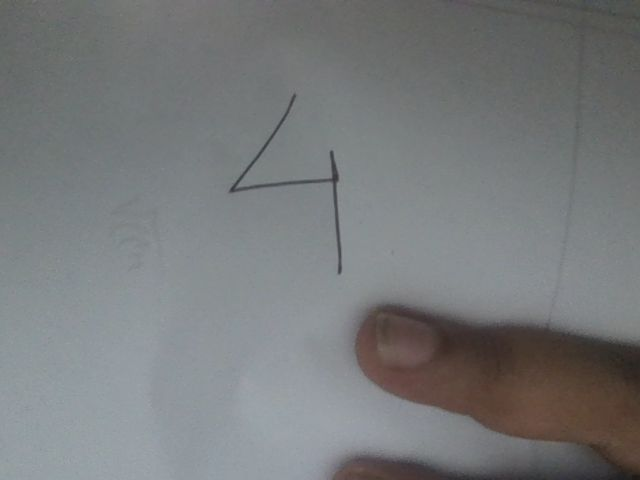

In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
from base64 import b64decode, b64encode
import PIL.Image
from google.colab.patches import cv2_imshow

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Take Photo';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      div.appendChild(video);
      document.body.appendChild(div);

      // Get stream
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      // Resize output
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for click
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture photo
filename = take_photo()
print("Saved to", filename)

# OpenCV read
img = cv2.imread(filename)
cv2_imshow(img)  # cv2_imshow is for Colab, not cv2.imshow

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted digit: 2


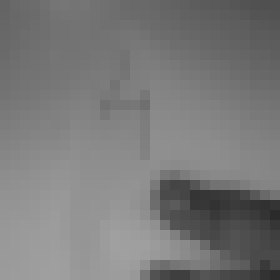

In [14]:
# --- Your existing preprocessing ---
img = cv2.imread("photo.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

if np.mean(resized) > 127:
    resized = 255 - resized

resized = resized / 255.0
input_img = resized.astype("float32").reshape(1, 784)
pred = model.predict(input_img)
digit = np.argmax(pred)
print("Predicted digit:", digit)

# --- Show preprocessed image in a larger size ---
# Scale factor (e.g., 10x bigger)
scale_factor = 10
large_img = cv2.resize((resized * 255).astype("uint8"), (28*scale_factor, 28*scale_factor), interpolation=cv2.INTER_NEAREST)

cv2_imshow(large_img)